# **Data Visualisation Notebook**

## Objectives

TODO
* Answer business requirement 1: xxxxxxxxxx FILL IN see walkthrough one
* Visualise data for initial data evaluation for model planning


## Inputs

* inputs/cherry_leaves-dataset/cherry-leaves/train
* inputs/cherry_leaves-dataset/cherry-leaves/test
* inputs/cherry_leaves-dataset/cherry-leaves/validation

## Outputs
* DEFINE TODO 
* Image shape embeddings pickle file 

## Additional Comments

* DEFINE TODO
* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



Initial plan EDIT:

import libraries to notebook
set directories after cwd to root
set output directory
set label names - CHECK WHAT THIS IS FIRST

__

Data visualisation of image data
compute average image size on train 
reformat as 100x100 ?
save process for all image shape fit transform to image shape embeddings joblib dump as pkl file
list as output  at top 

__

Average and variablility of images per label
Plot and save mean and variability of images per label for visual rep

__

Difference between inrfected and non infected average image:
show infect, uninfect, difference between as series of 3

Create image montage per label
set head so not loads - have function available for dashboard?

Save notebook and pkl file


---

# Prepare notebook

## Import libraries 

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

Get root dir for inputs access

In [5]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/cherry-ML/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [6]:
os.chdir(os.path.dirname(current_dir))
print(f"You set a new current directory")

You set a new current directory


Confirm the new current directory as working directory

In [7]:
workdir = os.getcwd()
print(workdir)

/workspace/cherry-ML


### Import requirements now in root

In [8]:
!pip install -r requirements.txt

### Set input directories:

In [9]:
my_data_dir = 'inputs/cherry-leaves-dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directory:

In [10]:
# set version in file path
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(workdir) and version in os.listdir(workdir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)


Old version is already available create a new version.


### Confirm label names and contents:

In [11]:
labels = os.listdir(train_path)
print(f'labels are:\n {labels}\n')

# confirm number of files in each label folder
for label in labels:
    label_path = f'{train_path}/{label}'
    print(f"Number of files in {label}: {len(os.listdir(label_path))}")


labels are:
 ['healthy', 'powdery_mildew']

Number of files in healthy: 1472
Number of files in powdery_mildew: 1472


# Section 1 - Data Visualiation

***


### Confirm all image sizes

Width range: 256 to 256
Height range: 256 to 256


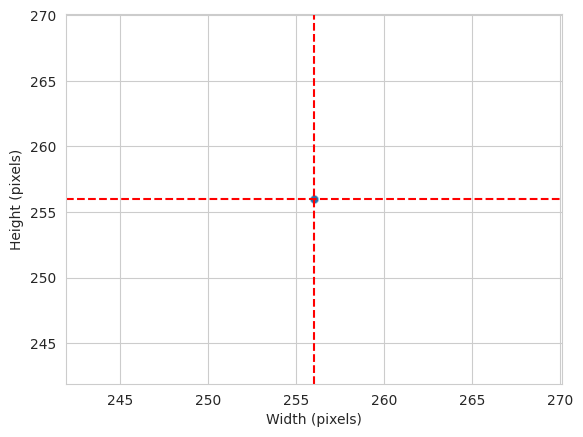

Width average: 256 
Height average: 256


In [12]:
dim1, dim2 = [], []

for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

print(f"Width range: {min(dim2)} to {max(dim2)}")
print(f"Height range: {min(dim1)} to {max(dim1)}")

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")


[OBSERVATION] We can clearly see that all the images are the same height and width: 256x256 pixels

As each image is the same shape, and a perfect square where both height and width of every image is 256 pixels, there is no need to alter image shape to get an average size for equal image handling.

For the sake of future scalability where images will not be the same size in other datasets, we will save the image shape as the mean average of each image in the dataset.

In [13]:
image_shape = (dim1_mean, dim2_mean, 3)  # 3 for standard RGB
image_shape

(256, 256, 3)

In [14]:
# Save the image embeddings:
joblib.dump(value=image_shape, filename=f'{file_path}/image_shape.pkl')

['outputs/v1/image_shape.pkl']

---

# Section 2 - Average and variability of images per label

Load images in array using TensorFlow

In [15]:
# confirm my_data_dir
my_data_dir

'inputs/cherry-leaves-dataset/cherry-leaves'

In [21]:
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, new_size=(50,50), n_images_per_label=int):

    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0 

        for image_filename in os.listdir(my_data_dir + '/' + label):
             
             if counter < n_images_per_label:  # TODO: remove after testing

                img = image.load_img(
                    my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)\
                
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:    
                    img_resized = image.img_to_array(img)
                
                X = np.append(
                    X, img_resized).reshape(
                        -1, new_size[0], new_size[1], img_resized.shape[2]) # 50, 50, 3
                y = np.append(y, label)

                counter += 1  # TODO: remove after testing

    return X, y




In [22]:
# TODO remove n_images after testing
# Load ALL image shapes and labels in an array
X, y = load_image_as_array(my_data_dir=train_path, new_size=image_shape, n_images_per_label=20)
print(X.shape, y.shape)

(40, 256, 256, 3) (40,)


In [23]:
# confirm file path for saving plots later
file_path

'outputs/v1'

In [24]:
# Plot and save mean and variability of images per label
def plot_mean_variability_per_label(X, y, figsize=(12, 5), saveImage=False):
    """
    - Loop over all lables
    - Subset an array for a given label
    - Calculate mean and standard deviation 
    - Create fig displaying mean and images' variability  
    - Save image (not by default)
    """

    for label_to_display in np.unique(y):
        sns.set_style('darkgrid')

        # name label tidy
        y = y.reshape(-1, 1, 1)
        # avoid duplicates
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_image = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')  # try other types? TODO
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(avg_img, cmap='gray')  # try other types? TODO

        # if saving the image
        if saveImage:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png",
                        bbox_inches='tight', dpi=150)
        
        else:
            plt.tight_layout()
            plt.show()
            print('\n')

# X = saved image from tensor all images array
# y = attached label for each image

==== Label healthy ====
Image Shape: (256, 256, 3)


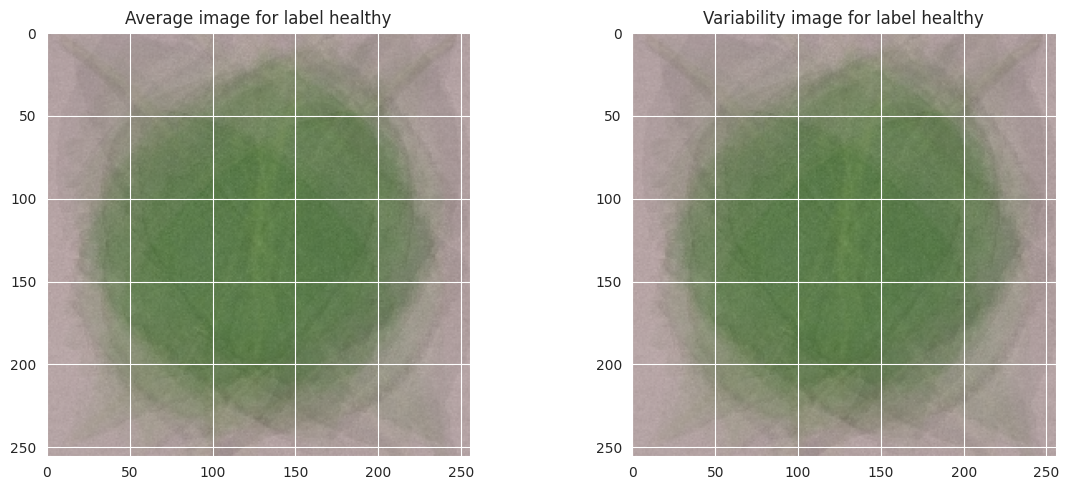



==== Label powdery_mildew ====
Image Shape: (256, 256, 3)


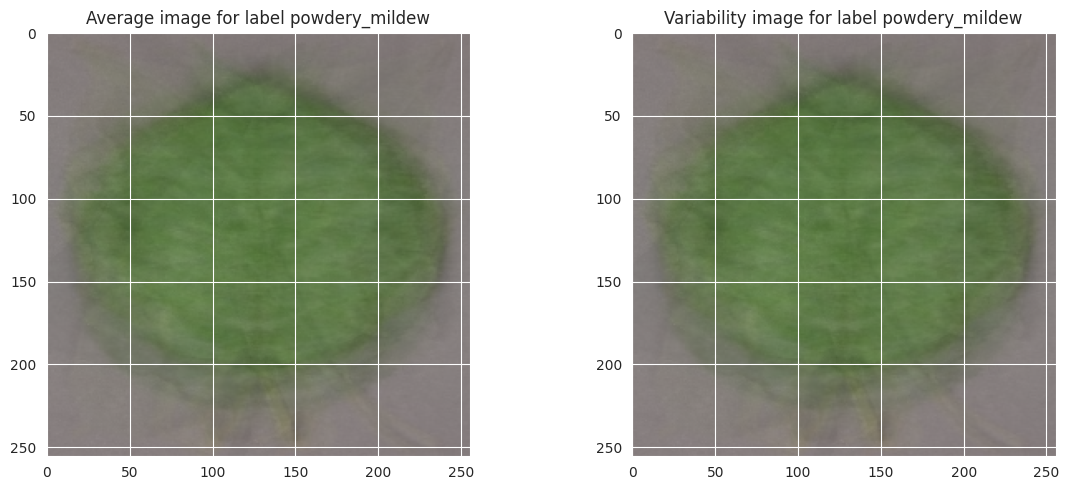

In [26]:
plot_mean_variability_per_label(X=X, y=y, figsize=(12, 5), saveImage=False) # TODO save image when running for real

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
# import os
# try:
#     # create here your folder
#     # os.makedirs(name='')
# except Exception as e:
#     print(e)
